# Chicago Preparation 2

Preparing the Data for analysation. We will group the crimes together in this notebook. 

### Loading in the Data

In [61]:
import os.path
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The cleaned Chicago crime dataset is loaded...

In [62]:
if not os.path.exists( "../../data/prep/100_Chicago.csv" ):
    print("Missing dataset file")

In [63]:
ch = pd.read_csv( "../../data/prep/100_Chicago.csv", index_col="Date", parse_dates=True)

In [64]:
ch.head()

,ID,Case Number,Primary Type,Description,Location Description,Domestic,Year,Latitude,Longitude,Location
Date,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,BATTERY,AGGRAVATED: HANDGUN,STREET,False,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)"
2015-03-18 22:45:00,10000095,HY190052,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,2015,41.813861,-87.596643,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,10000096,HY190054,BATTERY,SIMPLE,APARTMENT,False,2015,41.800802,-87.622619,"(41.800802415, -87.622619343)"
2015-03-18 22:00:00,10000098,HY190032,BATTERY,SIMPLE,APARTMENT,False,2015,41.805443,-87.604284,"(41.805443345, -87.604283976)"
2015-03-18 23:00:00,10000099,HY190047,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,2015,41.766403,-87.649296,"(41.766402779, -87.649296123)"


### Dropping more columns

More unnecessary columns are dropped. There is no need for ID or Case Number. The Location data (if needed) is available in its own column so Latitude and Longitude can be deleted. We also have access to the year already

In [65]:
ch = ch.drop('ID', 1)
ch = ch.drop('Case Number', 1)
ch = ch.drop('Year', 1)
ch = ch.drop('Latitude', 1)
ch = ch.drop('Longitude', 1)

In [66]:
pt = ch.groupby('Primary Type')[('Description')].count()
pt.sort_values(ascending = False)

Primary Type
BATTERY                       670819
CRIMINAL DAMAGE               420913
ASSAULT                       230443
OFFENSE INVOLVING CHILDREN     27175
ARSON                           5703
OBSCENITY                        415
Name: Description, dtype: int64

In [67]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1355468 entries, 2015-03-18 19:44:00 to 2018-01-17 13:45:00
Data columns (total 5 columns):
Primary Type            1355468 non-null object
Description             1355468 non-null object
Location Description    1355463 non-null object
Domestic                1355468 non-null bool
Location                1350700 non-null object
dtypes: bool(1), object(4)
memory usage: 53.0+ MB


In [68]:
ch.head()

,Primary Type,Description,Location Description,Domestic,Location
Date,,,,,
2015-03-18 19:44:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,"(41.891398861, -87.744384567)"
2015-03-18 22:45:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,BATTERY,SIMPLE,APARTMENT,False,"(41.800802415, -87.622619343)"
2015-03-18 22:00:00,BATTERY,SIMPLE,APARTMENT,False,"(41.805443345, -87.604283976)"
2015-03-18 23:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.766402779, -87.649296123)"


### Grouping Crimes

We need to group our crimes under our 3 headings. 
Therefore if the crime is Assault and the domestic column is True then this would be grouped as 'Domestic', etc. 

In [69]:
t1 = ch[(ch['Primary Type'] == "BATTERY") & (ch['Domestic'] == True)]
t2 = ch[(ch['Primary Type'] == "ASSAULT") & (ch['Domestic'] == True)]
t3 = ch[(ch['Primary Type'] == "OFFENSE INVOLVING CHILDREN") & (ch['Domestic'] == True)]

t4 = ch[(ch['Primary Type'] == "BATTERY") & (ch['Domestic'] == False)]
t5 = ch[(ch['Primary Type'] == "ASSAULT") & (ch['Domestic'] == False)]
t6 = ch[(ch['Primary Type'] == "OFFENSE INVOLVING CHILDREN") & (ch['Domestic'] == False)]

t7 = ch[(ch['Primary Type'] == "CRIMINAL DAMAGE")]
t8 = ch[(ch['Primary Type'] == "ARSON")]

The domestic columns are grouped...

In [70]:
fram = [t1, t2, t3]
domestic = pd.concat(fram)

In [71]:
domestic.head()

,Primary Type,Description,Location Description,Domestic,Location
Date,,,,,
2015-03-18 22:45:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.81386068, -87.596642837)"
2015-03-18 23:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.766402779, -87.649296123)"
2015-03-18 21:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.817552577, -87.619818523)"
2015-03-18 23:30:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.848024395, -87.682090877)"
2015-03-18 22:45:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.787480544, -87.618458018)"


They are all named 'Domestic'.

In [72]:
domestic['Primary Type'] = domestic['Primary Type'].apply(lambda x: str ('Domestic'))

In [73]:
domestic.head()

,Primary Type,Description,Location Description,Domestic,Location
Date,,,,,
2015-03-18 22:45:00,Domestic,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.81386068, -87.596642837)"
2015-03-18 23:00:00,Domestic,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.766402779, -87.649296123)"
2015-03-18 21:35:00,Domestic,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.817552577, -87.619818523)"
2015-03-18 23:30:00,Domestic,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.848024395, -87.682090877)"
2015-03-18 22:45:00,Domestic,DOMESTIC BATTERY SIMPLE,APARTMENT,True,"(41.787480544, -87.618458018)"


We can now drop the columns that we used to group our crimes. They are no longer needed. 

In [74]:
domestic = domestic.drop('Description', 1)
domestic = domestic.drop('Domestic', 1)

The assault columns are grouped. 

In [75]:
fram1 = [t4, t5, t6]
assault = pd.concat(fram1)

In [76]:
assault.head()

,Primary Type,Description,Location Description,Domestic,Location
Date,,,,,
2015-03-18 19:44:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,"(41.891398861, -87.744384567)"
2015-03-18 22:30:00,BATTERY,SIMPLE,APARTMENT,False,"(41.800802415, -87.622619343)"
2015-03-18 22:00:00,BATTERY,SIMPLE,APARTMENT,False,"(41.805443345, -87.604283976)"
2015-03-18 21:25:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,"(41.71745472, -87.617663257)"
2015-03-18 22:50:00,BATTERY,SIMPLE,SIDEWALK,False,"(41.86304084, -87.666288555)"


Every cell in the column is named 'Assault'. 

In [77]:
assault['Primary Type'] = assault['Primary Type'].apply(lambda x: str ('Assault'))

In [78]:
assault.head()

,Primary Type,Description,Location Description,Domestic,Location
Date,,,,,
2015-03-18 19:44:00,Assault,AGGRAVATED: HANDGUN,STREET,False,"(41.891398861, -87.744384567)"
2015-03-18 22:30:00,Assault,SIMPLE,APARTMENT,False,"(41.800802415, -87.622619343)"
2015-03-18 22:00:00,Assault,SIMPLE,APARTMENT,False,"(41.805443345, -87.604283976)"
2015-03-18 21:25:00,Assault,SIMPLE,RESIDENCE PORCH/HALLWAY,False,"(41.71745472, -87.617663257)"
2015-03-18 22:50:00,Assault,SIMPLE,SIDEWALK,False,"(41.86304084, -87.666288555)"


The Description and Domestic columns are dropped as they are no longer needed for our project. We already have the primary types. 

In [79]:
assault = assault.drop('Description', 1)
assault = assault.drop('Domestic', 1)

Checking where the most assaults occur. This will be key for our weather hypothesis. 

In [80]:
offence = assault.groupby('Location Description')[('Primary Type')].count()
offence.sort_values(ascending=False).head()

Location Description
SIDEWALK                    113622
STREET                      105656
RESIDENCE                    56811
APARTMENT                    56167
SCHOOL, PUBLIC, BUILDING     36435
Name: Primary Type, dtype: int64

The vandalism dataframes are joined. 

In [81]:
fram2 = [t7, t8]
vandalism = pd.concat(fram2)

In [82]:
vandalism['Primary Type'] = vandalism['Primary Type'].apply(lambda x: str ('Vandalism'))

In [83]:
vandalism.head()

,Primary Type,Description,Location Description,Domestic,Location
Date,,,,,
2015-03-18 21:30:00,Vandalism,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,"(41.658138493, -87.613672862)"
2015-03-19 00:35:00,Vandalism,CRIMINAL DEFACEMENT,FACTORY/MANUFACTURING BUILDING,False,"(41.939055884, -87.730240399)"
2015-03-18 22:45:00,Vandalism,TO PROPERTY,APARTMENT,False,"(41.777694703, -87.607128049)"
2015-03-18 23:20:00,Vandalism,CRIMINAL DEFACEMENT,RESIDENCE,False,"(41.782423303, -87.771668137)"
2015-03-19 02:55:00,Vandalism,TO PROPERTY,ALLEY,False,"(41.813610224, -87.702061305)"


In [84]:
vandalism = vandalism.drop('Description', 1)
vandalism = vandalism.drop('Domestic', 1)

In [85]:
offence1 = vandalism.groupby('Location Description')[('Primary Type')].count()
offence1.sort_values(ascending=False).head()

Location Description
STREET                            152840
RESIDENCE                          79356
APARTMENT                          50330
RESIDENCE-GARAGE                   20110
PARKING LOT/GARAGE(NON.RESID.)     17673
Name: Primary Type, dtype: int64

We then join our three dataframes to make a full crime dataframe. 

In [86]:
fram3 = [vandalism, domestic, assault]
ch_full = pd.concat(fram3, axis = 0)

In [87]:
ch_full.tail()

,Primary Type,Location Description,Location
Date,,,
2018-02-02 11:40:00,Assault,RESIDENCE,"(41.698512614, -87.560750269)"
2018-02-02 14:00:00,Assault,"SCHOOL, PUBLIC, GROUNDS","(41.783284821, -87.590814803)"
2018-02-02 08:00:00,Assault,RESIDENCE,"(41.710854293, -87.566967811)"
2018-02-02 16:42:00,Assault,RESIDENCE,"(41.767220219, -87.587920939)"
2018-02-02 15:00:00,Assault,RESIDENCE,"(41.774275614, -87.604574728)"


In [88]:
ch_full = ch_full.drop('Location Description', 1)
ch_full = ch_full.drop('Location', 1)

This new dataframe is saved as a new csv file. 

In [89]:
ch_full.to_csv('../../data/prep/110_Chicago.csv')

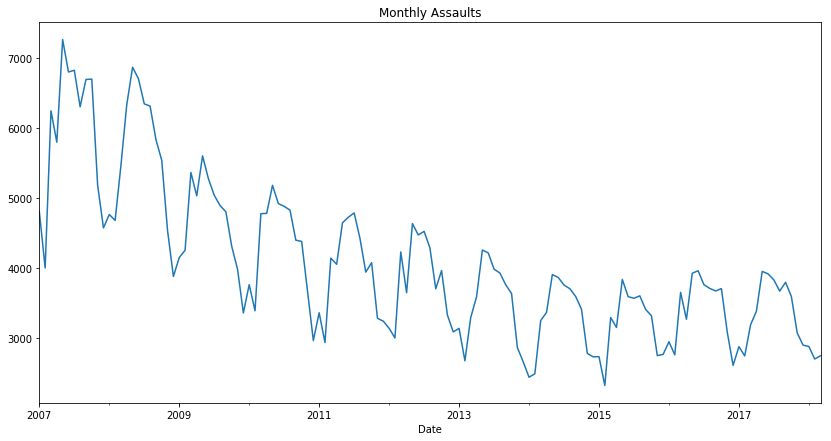

In [90]:
ct = ch_full
ass = ct[ct['Primary Type'] == "Assault"]['Primary Type']
ass.resample('M').count().plot(figsize=(14,7))
plt.title('Monthly Assaults')
plt.show()